# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- remove MetaData class, +clean doi_list
- resolve identical label
- deals with ghost ref, i.e. without doi
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive app + flask
- [x] multi doi query: https://github.com/CrossRef/rest-api-doc/issues/301

- look at: https://en.wikipedia.org/wiki/Bibliographic_coupling

### With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/), https://search.crossref.org/references

- get country/city/univ  get flag/favicon


### with scopus 'cited by':
- doi list cited by  + cited by count
- query each
- graph


In [6]:
import crossrefexp as exp

In [7]:
store = exp.MetaDataStore('data/cachemetadata_test110.pickle')

default pickle location set to data/cachemetadata_test110.pickle


In [8]:
doi1 = "10.1103/PhysRevA.62.012306"
doi2 = "10.1063/1.3501022"

In [9]:
# Query metadata on Crossref
store.query([doi1, doi2])
print( '\n', store.get_info(doi1) )
print( '\n', store.get_info(doi2) )

Requesing 2 metadata:
Query performed in 0.282578 s. (2 doi)
2 metadata returned for 2 asked
data/cachemetadata_test110.pickle saved.

 Electron-spin-resonance transistors for quantum computing in silicon-german...
(2000) Physical Review A
Rutger Vrijen, Eli Yablonovitch, Kang Wang, Hong Wen Jiang, Alex Balandin, Vwani Roychowdhury, Tal Mor, David DiVincenzo
35 references - 35 given and 31 with doi
588 times cited.


 Analytical investigation of electrical breakdown properties in a nitrogen-S...
(2010) Physics of Plasmas
Han S. Uhm, Yong S. Byeon, Ki B. Song, Eun H. Choi, Han-Yong Ryu, Jaimin Lee
41 references - 41 given and 31 with doi
14 times cited.



In [12]:
store

{'10.1002/pssb.2220620205': {'DOI': '10.1002/pssb.2220620205',
  'ISSN': ['0370-1972', '1521-3951'],
  'URL': 'http://dx.doi.org/10.1002/pssb.2220620205',
  'author': [{'affiliation': [],
    'family': 'Vollmer',
    'given': 'H.',
    'sequence': 'first'},
   {'affiliation': [],
    'family': 'Geist',
    'given': 'D.',
    'sequence': 'additional'}],
  'container-title': ['physica status solidi (b)'],
  'content-domain': {'crossmark-restriction': False, 'domain': []},
  'created': {'date-parts': [[2007, 7, 10]],
   'date-time': '2007-07-10T04:53:45Z',
   'timestamp': 1184043225000},
  'deposited': {'date-parts': [[2017, 6, 17]],
   'date-time': '2017-06-17T20:39:57Z',
   'timestamp': 1497731997000},
  'indexed': {'date-parts': [[2018, 5, 3]],
   'date-time': '2018-05-03T20:23:54Z',
   'timestamp': 1525379034885},
  'is-referenced-by-count': 7,
  'issn-type': [{'type': 'print', 'value': '0370-1972'},
   {'type': 'electronic', 'value': '1521-3951'}],
  'issue': '2',
  'issued': {'date-

growth achieved - 64 nodes in the graph. The last generation number is 1.
Requesing 62 metadata:
Query performed in 1.105582 s. (62 doi)
62 metadata returned for 62 asked
data/cachemetadata_test110.pickle saved.
growth achieved - 539 nodes in the graph. The last generation number is 2.
Requesing 20 metadata:
Query performed in 0.394334 s. (20 doi)
20 metadata returned for 20 asked
data/cachemetadata_test110.pickle saved.
graphs/Vrijen2000Uhm2010_gen2_top30_noSecondaryLink.svg  saved


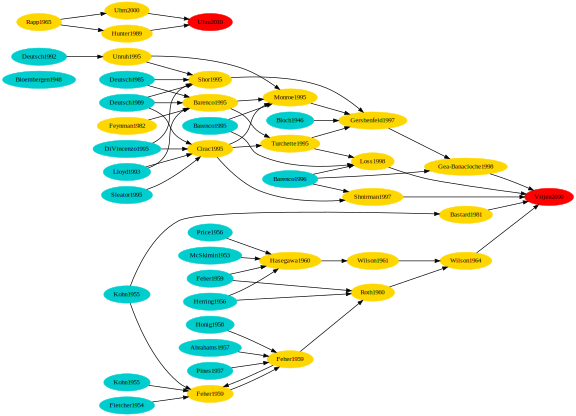

In [10]:
# Build the graph and everything:
gr = store.get_refgraphviz( [doi1, doi2], gen=2, top=30, draw_secondary_links=False )
gr

In [8]:
help(store.get_refgraphviz)

Help on method get_refgraphviz in module crossrefexp:

get_refgraphviz(doi_list, gen=2, top=3, save=True, draw_secondary_links=True) method of crossrefexp.MetaDataStore instance
    Build the reference graph for `gen` generations, starting at the
    articles in `doi_list`. Then, keep only the upward graph generated
    from the `top`-cited references. Return a Graphviz object.
    
    Parameters
    ----------
    doi_list : list of doi string or one doi string
    gen : int, default 2
        number of generation
    top : int, default 3
        number of references to start from when generating the upward graph
    save: bool, default True
        if True save the graph in a svg file
    draw_secondary_links: default True
        if False do not draw the secondary links
        (a link is considered secondary if a longer path exist)



In [9]:
# List of the top cited refs.
gr = store.build_a_refgraph( doi3, gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:20]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )

NameError: name 'doi3' is not defined